In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet_cu110<2.0.0"
!pip install autogluon==0.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [ ]:
# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
import os
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read data
df = pd.read_csv('autogluon_santa_barbara.csv')
print(df.shape)
df = df.drop(columns = df.columns[0], axis=1)
df = df.rename(columns = {"rating" : "Rating", "review" : "Review"})
df

(162022, 20)


,business_id,name,categories,Review,latitude,longitude,total_rating,Rating,review_words,clean_review_words,clean_review,cuisine,adjectives,nouns,adj_noun_pairs,noun_pairs,is_feature_in_review,food,color
0,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",#fatjared say...this will be the shortest revi...,34.421931,-119.702185,3.0,1.0,"['#fatjared', 'say...this', 'will', 'be', 'the...","['fatjared', 'say', 'will', 'be', 'the', 'shor...",fatjared say will be the shortest review i hav...,Italian,"{'shortest', 'dry', 'right', 'nasty', 'low', '...","{'bread', 'stars', 'wife', 'time', 'review', '...","{'shortest': ['the shortest review', 'the shor...","{'bread': ['bread', 'the bread'], 'stars': ['0...",False,False,False
1,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",$5 for a cup of coffee that was not refilled. ...,34.421931,-119.702185,3.0,2.0,"['$5', 'for', 'a', 'cup', 'of', 'coffee', 'tha...","['', 'for', 'a', 'cup', 'of', 'coffee', 'that'...",for a cup of coffee that was not refilled nor...,Italian,"{'dry', 'okay', 'better', 'indifferent', 'huge'}","{'bit', 'lunch', 'vegetables', 'waitress', 'cu...","{'better': ['much better meals'], 'huge': ['a ...","{'lunch': ['lunch'], 'vegetables': ['vegetable...",False,False,False
2,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",********??\nWe have been a long time patron of...,34.421931,-119.702185,3.0,3.0,"['********??', 'We', 'have', 'been', 'a', 'lon...","['', 'we', 'have', 'been', 'a', 'long', 'time'...",we have been a long time patron of the restau...,Italian,"{'complete', 'up', 'long', 'second', 'fantasti...","{'patron', 'board', 'time', 'establishment', '...","{'up': ['an up scale restaurant'], 'long': ['a...","{'patron': ['a long time patron'], 'board': ['...",False,False,False
3,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2 stars for the waiting staff, 3 stars for the...",34.421931,-119.702185,3.0,3.0,"['2', 'stars', 'for', 'the', 'waiting', 'staff...","['', 'stars', 'for', 'the', 'waiting', 'staff'...",stars for the waiting staff stars for the ni...,Italian,"{'same', 'sad', 'sure', 'nice'}","{'recipes', 'stars', 'staff', 'min', 'chase', ...",{'nice': ['the nice manager']},"{'recipes': ['the recipes'], 'stars': ['2 star...",False,False,False
4,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",34.421931,-119.702185,3.0,2.0,"['2.5-3', 'Overall', 'Price', ""It's"", 'Santa',...","['', 'overall', 'price', 'it', 'santa', 'barba...",overall price it santa barbara so be prepared...,Italian,"{'overall', 'dense', 'many', 'few', 'frozen', ...","{'sauce', 'service', 'quality', 'place', 'musi...","{'dense': ['a really dense dough'], 'many': ['...","{'sauce': ['a cream sauce'], 'service': ['serv...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162017,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Sabor! \n\nChilangos is part of the Milk&Honey...,34.416792,-119.695894,3.5,4.0,"['Sabor!', 'Chilangos', 'is', 'part', 'of', 't...","['sabor', 'chilangos', 'is', 'part', 'of', 'th...",sabor chilangos is part of the milk family of ...,Mexican,"{'first', 'delicious', 'only', 'fresh', 'excel...","{'guava', 'time', 'family', 'thing', 'seafood'...","{'delicious': ['a delicious guava'], 'only': [...","{'guava': ['a delicious guava'], 'family': ['t...",False,False,False
162018,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",The salsa roja has improved! WOOHOO!! And now ...,34.416792,-119.695894,3.5,4.0,"['The', 'salsa', 'roja', 'has', 'improved!', '...","['the', 'salsa', 'roja', 'has', 'improved', 'w...",the salsa roja has improved woohoo and now the...,Mexican,"{'fresh', 'permanent'}","{'handmade', 'lunch', 'roster'}","{'fresh': 

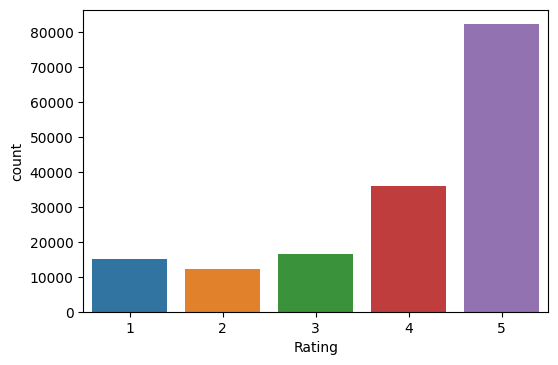

In [ ]:
import seaborn as sns
plt.figure(dpi=100)
sns.countplot(x='Rating', data=df2)

## Train and Test datasets [1 point]

Create these datasets once and save them for use in answering the 3 questions that follow. 

Use a 80:20 train-test split. 

In [ ]:
def train_and_evaluate(df, label='Rating', hyperparameter_tuning=False):
  def print_class_rep(class_rep):
    for rating in ['1', '2', '3','4','5']:
      print("Rating: "+ rating)
      print("Precision: "+ str(class_rep[rating]['precision'])+ ", Recall: "+ str(class_rep[rating]['recall'])+", F1:"+str(class_rep[rating]['f1-score']))

  def evaluate(data, datatype='Train'):
    print("Model Evaluation on "+datatype+" data")
    performance = predictor.evaluate(train_data)
    y_test = data[label]
    data = data.drop(labels=[label],axis=1)
    y_pred = predictor.predict(data)
    y_prob = np.array(predictor.predict_proba(data))
    perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
    print("Accuracy: "+str(perf['accuracy']))
    print("MCC: "+str(perf['matthews_corrcoef']))
    print("Confusion Matrix: ")
    print(perf['confusion_matrix'])
    print_class_rep(perf['classification_report'])
  
    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 5

    for i in range(5):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=str(i+1))
    
    plt.figure(dpi=150)
    plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Rating 1 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Rating 2 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Rating 3 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Rating 4 vs Rest')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label='Rating 5 vs Rest')
    plt.title('Multiclass ROC curve for '+ datatype)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=100);
    print('Area under curve (AUC) Rating 1: ', auc(fpr[0],tpr[0]))
    print('Area under curve (AUC) Rating 2: ', auc(fpr[1],tpr[1]))
    print('Area under curve (AUC) Rating 3: ', auc(fpr[2],tpr[2]))
    print('Area under curve (AUC) Rating 4: ', auc(fpr[3],tpr[3]))
    print('Area under curve (AUC) Rating 5: ', auc(fpr[4],tpr[4]))

  train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
  print("Train size =",train_data.shape," | Test size =",test_data.shape)
  if hyperparameter_tuning:
    predictor = TabularPredictor(label=label).fit(train_data=train_data)
  else:
    predictor = TabularPredictor(label=label).fit(train_data=train_data, hyperparameters='multimodal')
  print("Training Complete")
  
  evaluate(train_data, datatype='Train')
  evaluate(test_data, datatype='Test')


## Question 1 [2 points]

1. Using the [Harvard Inquirer Dictionary](http://www.wjh.harvard.edu/~inquirer/inqdict.txt), count the number of positive and negative words in each review. Add two columns to the dataset, one for the count of positive words and the other for the count of negative words. 

2. Show the histogram of these word count columns. 

(You may want to stem the words in the Review column and those in inqdict before you match them and count words. Why?)

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

nltk.download('punkt')

def stemText(text_array):
    stemmed_text = []
    for h in text_array:
        if h:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                h2 = h2 + PorterStemmer().stem(w)
            stemmed_text.append(h2)
    return stemmed_text

def cleanWord(string):
    pattern = re.compile(r'[a-z]+')
    word = string.lower()
    if not word.isalpha():
        word = pattern.findall(word)
    if type(word) == str:
        return word
    if type(word) == list and len(word) != 0:
        return word[0]


def createWordBag(dataset):
  with open('inqdict.txt') as f:
    lines = f.readlines()

  neg_words = list()
  pos_words = list()
  for line in lines[1:]:
      str_array = line.split()
      if "Neg" in str_array:
        word = cleanWord(str_array[0])
        neg_words.append(word)
      elif "Pos" in str_array:
        word = cleanWord(str_array[0])
        pos_words.append(word)
  return set(stemText(pos_words)), set(stemText(neg_words))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['Review_Words'] = df.Review.apply(lambda r : r.split())
df['Stemmed_Review'] = df.Review_Words.apply(lambda r : stemText([cleanWord(word) for word in r]))
df

,business_id,name,categories,Review,latitude,longitude,total_rating,Rating,review_words,clean_review_words,...,cuisine,adjectives,nouns,adj_noun_pairs,noun_pairs,is_feature_in_review,food,color,Review_Words,Stemmed_Review
0,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",#fatjared say...this will be the shortest revi...,34.421931,-119.702185,3.0,1.0,"['#fatjared', 'say...this', 'will', 'be', 'the...","['fatjared', 'say', 'will', 'be', 'the', 'shor...",...,Italian,"{'shortest', 'dry', 'right', 'nasty', 'low', '...","{'bread', 'stars', 'wife', 'time', 'review', '...","{'shortest': ['the shortest review', 'the shor...","{'bread': ['bread', 'the bread'], 'stars': ['0...",False,False,False,"[#fatjared, say...this, will, be, the, shortes...","[fatjar, say, will, be, the, shortest, review,..."
1,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",$5 for a cup of coffee that was not refilled. ...,34.421931,-119.702185,3.0,2.0,"['$5', 'for', 'a', 'cup', 'of', 'coffee', 'tha...","['', 'for', 'a', 'cup', 'of', 'coffee', 'that'...",...,Italian,"{'dry', 'okay', 'better', 'indifferent', 'huge'}","{'bit', 'lunch', 'vegetables', 'waitress', 'cu...","{'better': ['much better meals'], 'huge': ['a ...","{'lunch': ['lunch'], 'vegetables': ['vegetable...",False,False,False,"[$5, for, a, cup, of, coffee, that, was, not, ...","[for, a, cup, of, coffe, that, wa, not, refil,..."
2,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",********??\nWe have been a long time patron of...,34.421931,-119.702185,3.0,3.0,"['********??', 'We', 'have', 'been', 'a', 'lon...","['', 'we', 'have', 'been', 'a', 'long', 'time'...",...,Italian,"{'complete', 'up', 'long', 'second', 'fantasti...","{'patron', 'board', 'time', 'establishment', '...","{'up': ['an up scale restaurant'], 'long': ['a...","{'patron': ['a long time patron'], 'board': ['...",False,False,False,"[********??, We, have, been, a, long, time, pa...","[we, have, been, a, long, time, patron, of, th..."
3,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2 stars for the waiting staff, 3 stars for the...",34.421931,-119.702185,3.0,3.0,"['2', 'stars', 'for', 'the', 'waiting', 'staff...","['', 'stars', 'for', 'the', 'waiting', 'staff'...",...,Italian,"{'same', 'sad', 'sure', 'nice'}","{'recipes', 'stars', 'staff', 'min', 'chase', ...",{'nice': ['the nice manager']},"{'recipes': ['the recipes'], 'stars': ['2 star...",False,False,False,"[2, stars, for, the, waiting, staff,, 3, stars...","[star, for, the, wait, staff, star, for, the, ..."
4,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",34.421931,-119.702185,3.0,2.0,"['2.5-3', 'Overall', 'Price', ""It's"", 'Santa',...","['', 'overall', 'price', 'it', 'santa', 'barba...",...,Italian,"{'overall', 'dense', 'many', 'few', 'frozen', ...","{'sauce', 'service', 'quality', 'place', 'musi...","{'dense': ['a really dense dough'], 'many': ['...","{'sauce': ['a cream sauce'], 'service': ['serv...",False,False,False,"[2.5-3, Overall, Price, It's, Santa, Barbara,,...","[overal, price, it, santa, barbara, so, be, pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162017,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Sabor! \n\nChilangos is part of the Milk&Honey...,34.416792,-119.695894,3.5,4.0,"['Sabor!', 'Chilangos', 'is', 'part', 'of', 't...","['sabor', 'chilangos', 'is', 'part', 'of', 'th...",...,Mexican,"{'first', 'delicious', 'only', 'fresh', 'excel...","{'guava', 'time', 'family', 'thing', 'seafood'...","{'delicious': ['a delicious guava'], 'only': [...","{'guava': ['a delicious guava'], 'family': ['t...",False,False,False,"[Sabor!, Chilangos, is, part, of, the, Milk&Ho...","[sabor, chilango, is, part, of, the, milk, fam..."
162018,zxW8zECv

In [ ]:
pos_words, neg_words = createWordBag('inqdict.txt')

In [ ]:
df["Pos_Count"] = df.Stemmed_Review.apply(lambda r: len([word for word in r if word in pos_words]))
df["Neg_Count"] = df.Stemmed_Review.apply(lambda r: len([word for word in r if word in neg_words]))
df

,business_id,name,categories,Review,latitude,longitude,total_rating,Rating,review_words,clean_review_words,...,nouns,adj_noun_pairs,noun_pairs,is_feature_in_review,food,color,Review_Words,Stemmed_Review,Pos_Count,Neg_Count
0,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",#fatjared say...this will be the shortest revi...,34.421931,-119.702185,3.0,1.0,"['#fatjared', 'say...this', 'will', 'be', 'the...","['fatjared', 'say', 'will', 'be', 'the', 'shor...",...,"{'bread', 'stars', 'wife', 'time', 'review', '...","{'shortest': ['the shortest review', 'the shor...","{'bread': ['bread', 'the bread'], 'stars': ['0...",False,False,False,"[#fatjared, say...this, will, be, the, shortes...","[fatjar, say, will, be, the, shortest, review,...",10,9
1,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",$5 for a cup of coffee that was not refilled. ...,34.421931,-119.702185,3.0,2.0,"['$5', 'for', 'a', 'cup', 'of', 'coffee', 'tha...","['', 'for', 'a', 'cup', 'of', 'coffee', 'that'...",...,"{'bit', 'lunch', 'vegetables', 'waitress', 'cu...","{'better': ['much better meals'], 'huge': ['a ...","{'lunch': ['lunch'], 'vegetables': ['vegetable...",False,False,False,"[$5, for, a, cup, of, coffee, that, was, not, ...","[for, a, cup, of, coffe, that, wa, not, refil,...",1,3
2,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",********??\nWe have been a long time patron of...,34.421931,-119.702185,3.0,3.0,"['********??', 'We', 'have', 'been', 'a', 'lon...","['', 'we', 'have', 'been', 'a', 'long', 'time'...",...,"{'patron', 'board', 'time', 'establishment', '...","{'up': ['an up scale restaurant'], 'long': ['a...","{'patron': ['a long time patron'], 'board': ['...",False,False,False,"[********??, We, have, been, a, long, time, pa...","[we, have, been, a, long, time, patron, of, th...",8,8
3,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2 stars for the waiting staff, 3 stars for the...",34.421931,-119.702185,3.0,3.0,"['2', 'stars', 'for', 'the', 'waiting', 'staff...","['', 'stars', 'for', 'the', 'waiting', 'staff'...",...,"{'recipes', 'stars', 'staff', 'min', 'chase', ...",{'nice': ['the nice manager']},"{'recipes': ['the recipes'], 'stars': ['2 star...",False,False,False,"[2, stars, for, the, waiting, staff,, 3, stars...","[star, for, the, wait, staff, star, for, the, ...",6,6
4,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",34.421931,-119.702185,3.0,2.0,"['2.5-3', 'Overall', 'Price', ""It's"", 'Santa',...","['', 'overall', 'price', 'it', 'santa', 'barba...",...,"{'sauce', 'service', 'quality', 'place', 'musi...","{'dense': ['a really dense dough'], 'many': ['...","{'sauce': ['a cream sauce'], 'service': ['serv...",False,False,False,"[2.5-3, Overall, Price, It's, Santa, Barbara,,...","[overal, price, it, santa, barbara, so, be, pr...",33,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162017,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Sabor! \n\nChilangos is part of the Milk&Honey...,34.416792,-119.695894,3.5,4.0,"['Sabor!', 'Chilangos', 'is', 'part', 'of', 't...","['sabor', 'chilangos', 'is', 'part', 'of', 'th...",...,"{'guava', 'time', 'family', 'thing', 'seafood'...","{'delicious': ['a delicious guava'], 'only': [...","{'guava': ['a delicious guava'], 'family': ['t...",False,False,False,"[Sabor!, Chilangos, is, part, of, the, Milk&Ho...","[sabor, chilango, is, part, of, the, milk, fam...",3,2
162018,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",The salsa roja has improved! WOOHOO!! And now ...,34.416792,-119.695894,3.5,4.0,"['The', 'salsa', 'roja', 'has', 'improved!', '...","['the', 'salsa', 'roja', 'has', 'improved', 'w...",...,"{'handmade', 'lunch', 'roster'}","{'fresh': ['fresh hand

Text(0, 0.5, 'Reviews')

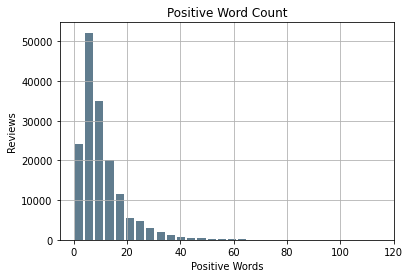

In [ ]:
df["Pos_Count"].plot.hist(grid=True, bins=30, rwidth=0.8,
                   color='#607c8e')
plt.title("Positive Word Count")
plt.xlabel('Positive Words')
plt.ylabel('Reviews')
#plt.yscale('log')


Text(0, 0.5, 'Reviews')

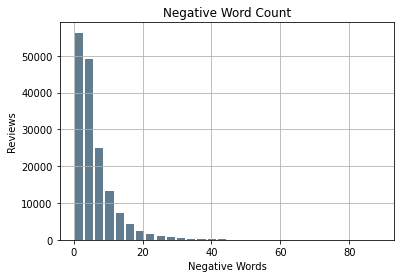

In [ ]:
df["Neg_Count"].plot.hist(grid=True, bins=30, rwidth=0.8,
                   color='#607c8e')
plt.title("Negative Word Count")
plt.xlabel('Negative Words')
plt.ylabel('Reviews')
#plt.yscale('log')

In [ ]:
df["Total_Tokens"] = df["Stemmed_Review"].apply(lambda r : len(r))

In [ ]:
df["Pos_Count_Normalized"] = df["Pos_Count"] / df["Total_Tokens"]
df["Neg_Count_Normalized"] = df["Neg_Count"] / df["Total_Tokens"]
df

,business_id,name,categories,Review,latitude,longitude,total_rating,Rating,review_words,clean_review_words,...,is_feature_in_review,food,color,Review_Words,Stemmed_Review,Pos_Count,Neg_Count,Total_Tokens,Pos_Count_Normalized,Neg_Count_Normalized
0,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",#fatjared say...this will be the shortest revi...,34.421931,-119.702185,3.0,1.0,"['#fatjared', 'say...this', 'will', 'be', 'the...","['fatjared', 'say', 'will', 'be', 'the', 'shor...",...,False,False,False,"[#fatjared, say...this, will, be, the, shortes...","[fatjar, say, will, be, the, shortest, review,...",10,9,156,0.064103,0.057692
1,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",$5 for a cup of coffee that was not refilled. ...,34.421931,-119.702185,3.0,2.0,"['$5', 'for', 'a', 'cup', 'of', 'coffee', 'tha...","['', 'for', 'a', 'cup', 'of', 'coffee', 'that'...",...,False,False,False,"[$5, for, a, cup, of, coffee, that, was, not, ...","[for, a, cup, of, coffe, that, wa, not, refil,...",1,3,46,0.021739,0.065217
2,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",********??\nWe have been a long time patron of...,34.421931,-119.702185,3.0,3.0,"['********??', 'We', 'have', 'been', 'a', 'lon...","['', 'we', 'have', 'been', 'a', 'long', 'time'...",...,False,False,False,"[********??, We, have, been, a, long, time, pa...","[we, have, been, a, long, time, patron, of, th...",8,8,94,0.085106,0.085106
3,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2 stars for the waiting staff, 3 stars for the...",34.421931,-119.702185,3.0,3.0,"['2', 'stars', 'for', 'the', 'waiting', 'staff...","['', 'stars', 'for', 'the', 'waiting', 'staff'...",...,False,False,False,"[2, stars, for, the, waiting, staff,, 3, stars...","[star, for, the, wait, staff, star, for, the, ...",6,6,66,0.090909,0.090909
4,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",34.421931,-119.702185,3.0,2.0,"['2.5-3', 'Overall', 'Price', ""It's"", 'Santa',...","['', 'overall', 'price', 'it', 'santa', 'barba...",...,False,False,False,"[2.5-3, Overall, Price, It's, Santa, Barbara,,...","[overal, price, it, santa, barbara, so, be, pr...",33,17,304,0.108553,0.055921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162017,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Sabor! \n\nChilangos is part of the Milk&Honey...,34.416792,-119.695894,3.5,4.0,"['Sabor!', 'Chilangos', 'is', 'part', 'of', 't...","['sabor', 'chilangos', 'is', 'part', 'of', 'th...",...,False,False,False,"[Sabor!, Chilangos, is, part, of, the, Milk&Ho...","[sabor, chilango, is, part, of, the, milk, fam...",3,2,83,0.036145,0.024096
162018,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",The salsa roja has improved! WOOHOO!! And now ...,34.416792,-119.695894,3.5,4.0,"['The', 'salsa', 'roja', 'has', 'improved!', '...","['the', 'salsa', 'roja', 'has', 'improved', 'w...",...,False,False,False,"[The, salsa, roja, has, improved!, WOOHOO!!, A...","[the, salsa, roja, ha, improv, woohoo, and, no...",2,0,21,0.095238,0.000000
162019,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican","This review is solely based on one time, eatin...",34.416792,-119.695894,3.5,5.0,"['This', 'review', 'is', 'solely', 'based', 'o...","['this', 'review', 'is', 'solely', 'based', 'o...",...,False,False,False,"[This, review, is, solely, based, on, one, tim...","[thi, review, is, sole, base, on, one, time, e...",16,14,187,0.085561,0.074866
162020,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Very fresh tasty food. Has been in business f...,34.416792,-119.695894,3.5,4.0,"['Very', 'fresh', 'tasty', 'food.', 'Has', 'be...","['very', 'fresh', 'tasty', 'food', '

In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['Pos_Count_Normalized','Neg_Count_Normalized']
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = (['Scaled_Num_of_pos_words','Scaled_Num_of_neg_words']))
scaled_features

,Scaled_Num_of_pos_words,Scaled_Num_of_neg_words
0,-1.081193,-0.063518
1,-1.818467,0.140164
2,-0.715652,0.678502
3,-0.614665,0.835564
4,-0.307605,-0.111461
...,...,...
162017,-1.567761,-0.972863
162018,-0.539325,-1.625082
162019,-0.707732,0.401332
162020,-1.368065,-1.625082


In [ ]:
df2 = pd.merge(df,scaled_features,left_index= True, right_index=True)
df2

,business_id,name,categories,Review,latitude,longitude,total_rating,Rating,review_words,clean_review_words,...,color,Review_Words,Stemmed_Review,Pos_Count,Neg_Count,Total_Tokens,Pos_Count_Normalized,Neg_Count_Normalized,Scaled_Num_of_pos_words,Scaled_Num_of_neg_words
0,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",#fatjared say...this will be the shortest revi...,34.421931,-119.702185,3.0,1.0,"['#fatjared', 'say...this', 'will', 'be', 'the...","['fatjared', 'say', 'will', 'be', 'the', 'shor...",...,False,"[#fatjared, say...this, will, be, the, shortes...","[fatjar, say, will, be, the, shortest, review,...",10,9,156,0.064103,0.057692,-1.081193,-0.063518
1,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",$5 for a cup of coffee that was not refilled. ...,34.421931,-119.702185,3.0,2.0,"['$5', 'for', 'a', 'cup', 'of', 'coffee', 'tha...","['', 'for', 'a', 'cup', 'of', 'coffee', 'that'...",...,False,"[$5, for, a, cup, of, coffee, that, was, not, ...","[for, a, cup, of, coffe, that, wa, not, refil,...",1,3,46,0.021739,0.065217,-1.818467,0.140164
2,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...",********??\nWe have been a long time patron of...,34.421931,-119.702185,3.0,3.0,"['********??', 'We', 'have', 'been', 'a', 'lon...","['', 'we', 'have', 'been', 'a', 'long', 'time'...",...,False,"[********??, We, have, been, a, long, time, pa...","[we, have, been, a, long, time, patron, of, th...",8,8,94,0.085106,0.085106,-0.715652,0.678502
3,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2 stars for the waiting staff, 3 stars for the...",34.421931,-119.702185,3.0,3.0,"['2', 'stars', 'for', 'the', 'waiting', 'staff...","['', 'stars', 'for', 'the', 'waiting', 'staff'...",...,False,"[2, stars, for, the, waiting, staff,, 3, stars...","[star, for, the, wait, staff, star, for, the, ...",6,6,66,0.090909,0.090909,-0.614665,0.835564
4,-3AooxIkg38UyUdlz5oXdw,Chase Restaurant,"Event Planning & Services, Restaurants, Nightl...","2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",34.421931,-119.702185,3.0,2.0,"['2.5-3', 'Overall', 'Price', ""It's"", 'Santa',...","['', 'overall', 'price', 'it', 'santa', 'barba...",...,False,"[2.5-3, Overall, Price, It's, Santa, Barbara,,...","[overal, price, it, santa, barbara, so, be, pr...",33,17,304,0.108553,0.055921,-0.307605,-0.111461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162017,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Sabor! \n\nChilangos is part of the Milk&Honey...,34.416792,-119.695894,3.5,4.0,"['Sabor!', 'Chilangos', 'is', 'part', 'of', 't...","['sabor', 'chilangos', 'is', 'part', 'of', 'th...",...,False,"[Sabor!, Chilangos, is, part, of, the, Milk&Ho...","[sabor, chilango, is, part, of, the, milk, fam...",3,2,83,0.036145,0.024096,-1.567761,-0.972863
162018,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",The salsa roja has improved! WOOHOO!! And now ...,34.416792,-119.695894,3.5,4.0,"['The', 'salsa', 'roja', 'has', 'improved!', '...","['the', 'salsa', 'roja', 'has', 'improved', 'w...",...,False,"[The, salsa, roja, has, improved!, WOOHOO!!, A...","[the, salsa, roja, ha, improv, woohoo, and, no...",2,0,21,0.095238,0.000000,-0.539325,-1.625082
162019,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican","This review is solely based on one time, eatin...",34.416792,-119.695894,3.5,5.0,"['This', 'review', 'is', 'solely', 'based', 'o...","['this', 'review', 'is', 'solely', 'based', 'o...",...,False,"[This, review, is, solely, based, on, one, tim...","[thi, review, is, sole, base, on, one, time, e...",16,14,187,0.085561,0.074866,-0.707732,0.401332
162020,zxW8zECvT_SqejieMMjb5A,Chilango's Mexican Restaurant,"Restaurants, Mexican",Very fresh tasty food. Has been in business f...,34.416792,-119.695894,3.5,4.0,"['Very

In [ ]:
df2 = df2.drop(0)

In [ ]:
df2[['Review', 'Rating', 'Review_Words', 'Stemmed_Review', 'Pos_Count', 'Neg_Count', 'Total_Tokens', 'Pos_Count_Normalized', 'Neg_Count_Normalized']]

,Review,Rating,Review_Words,Stemmed_Review,Pos_Count,Neg_Count,Total_Tokens,Pos_Count_Normalized,Neg_Count_Normalized
1,$5 for a cup of coffee that was not refilled. ...,2,"[$5, for, a, cup, of, coffee, that, was, not, ...","[for, a, cup, of, coffe, that, wa, not, refil,...",1,3,46,0.021739,0.065217
2,********??\nWe have been a long time patron of...,3,"[********??, We, have, been, a, long, time, pa...","[we, have, been, a, long, time, patron, of, th...",8,8,94,0.085106,0.085106
3,"2 stars for the waiting staff, 3 stars for the...",3,"[2, stars, for, the, waiting, staff,, 3, stars...","[star, for, the, wait, staff, star, for, the, ...",6,6,66,0.090909,0.090909
4,"2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",2,"[2.5-3, Overall, Price, It's, Santa, Barbara,,...","[overal, price, it, santa, barbara, so, be, pr...",33,17,304,0.108553,0.055921
5,A friend and I went here for lunch for the fir...,5,"[A, friend, and, I, went, here, for, lunch, fo...","[a, friend, and, i, went, here, for, lunch, fo...",15,8,144,0.104167,0.055556
...,...,...,...,...,...,...,...,...,...
162017,Sabor! \n\nChilangos is part of the Milk&Honey...,4,"[Sabor!, Chilangos, is, part, of, the, Milk&Ho...","[sabor, chilango, is, part, of, the, milk, fam...",3,2,83,0.036145,0.024096
162018,The salsa roja has improved! WOOHOO!! And now ...,4,"[The, salsa, roja, has, improved!, WOOHOO!!, A...","[the, salsa, roja, ha, improv, woohoo, and, no...",2,0,21,0.095238,0.000000
162019,"This review is solely based on one time, eatin...",5,"[This, review, is, solely, based, on, one, tim...","[thi, review, is, sole, base, on, one, time, e...",16,14,187,0.085561,0.074866
162020,Very fresh tasty food. Has been in business f...,4,"[Very, fresh, tasty, food., Has, been, in, bus...","[veri, fresh, tasti, food, ha, been, in, busi,...",1,0,21,0.047619,0.000000


## Question 2 [2 points]

1. Fit a multi-category machine learning model to the data using only the two new columns you created as features and the Rating column as the label. 

2. Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC. Report these values on the train and test datasets. 

(Think about how you would like to manage the two features. Do you want to express them as a percentage of total words in the review? Do you want to normalize the columns by scaling?)

In [ ]:
df2["Rating"] = df2.Rating.astype(int)

In [ ]:
df_with_counts = df2.loc[ : ,('Pos_Count', 'Neg_Count', 'Rating')]
df_with_counts

,Pos_Count,Neg_Count,Rating
1,1,3,2
2,8,8,3
3,6,6,3
4,33,17,2
5,15,8,5
...,...,...,...
162017,3,2,4
162018,2,0,4
162019,16,14,5
162020,1,0,4


In [ ]:
df_with_counts.Rating.unique()

array([2, 3, 5, 1, 4])

In [ ]:
df_with_scaled_counts = df2.loc[ : ,('Scaled_Num_of_pos_words', 'Scaled_Num_of_neg_words', 'Rating')]
df_with_scaled_counts

,Scaled_Num_of_pos_words,Scaled_Num_of_neg_words,Rating
1,-1.818467,0.140164,2
2,-0.715652,0.678502,3
3,-0.614665,0.835564,3
4,-0.307605,-0.111461,2
5,-0.383936,-0.121354,5
...,...,...,...
162017,-1.567761,-0.972863,4
162018,-0.539325,-1.625082,4
162019,-0.707732,0.401332,5
162020,-1.368065,-1.625082,4


In [ ]:
df_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162021 entries, 1 to 162021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Pos_Count  162021 non-null  int64
 1   Neg_Count  162021 non-null  int64
 2   Rating     162021 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [ ]:
def train_and_evaluate(df, label='Rating', hyperparameter_tuning=False):
  def print_class_rep(class_rep):
    for rating in ['1', '2', '3','4','5']:
      print("Rating: "+ rating)
      print("Precision: "+ str(class_rep[rating]['precision'])+ ", Recall: "+ str(class_rep[rating]['recall'])+", F1:"+str(class_rep[rating]['f1-score']))

  def evaluate(data, datatype='Train'):
    print("Model Evaluation on "+datatype+" data")
    performance = predictor.evaluate(train_data)
    y_test = data[label]
    data = data.drop(labels=[label],axis=1)
    y_pred = predictor.predict(data)
    y_prob = np.array(predictor.predict_proba(data))
    perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
    print("Accuracy: "+str(perf['accuracy']))
    print("MCC: "+str(perf['matthews_corrcoef']))
    print("Confusion Matrix: ")
    print(perf['confusion_matrix'])
    print_class_rep(perf['classification_report'])
  
    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 5

    for i in range(5):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i+1)
    
    plt.figure(dpi=150)
    plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Rating 1 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Rating 2 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Rating 3 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Rating 4 vs Rest')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label='Rating 5 vs Rest')
    plt.title('Multiclass ROC curve for '+ datatype)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=100);
    print('Area under curve (AUC) Rating 1: ', auc(fpr[0],tpr[0]))
    print('Area under curve (AUC) Rating 2: ', auc(fpr[1],tpr[1]))
    print('Area under curve (AUC) Rating 3: ', auc(fpr[2],tpr[2]))
    print('Area under curve (AUC) Rating 4: ', auc(fpr[3],tpr[3]))
    print('Area under curve (AUC) Rating 5: ', auc(fpr[4],tpr[4]))

  train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
  print("Train size =",train_data.shape," | Test size =",test_data.shape)
  if hyperparameter_tuning:
    predictor = TabularPredictor(label=label).fit(train_data=train_data)
  else:
    predictor = TabularPredictor(label=label).fit(train_data=train_data, hyperparameters='multimodal')
  print("Training Complete")
  
  evaluate(train_data, datatype='Train')
  evaluate(test_data, datatype='Test')


In [ ]:
int(4.5)

4

In [ ]:
df_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162021 entries, 1 to 162021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Pos_Count  162021 non-null  int64
 1   Neg_Count  162021 non-null  int64
 2   Rating     162021 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


No path specified. Models will be saved in: "AutogluonModels/ag-20220606_055922/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220606_055922/"
AutoGluon Version:  0.1.0
Train Data Rows:    129616
Train Data Columns: 2
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 5, 1, 3, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6043.28 MB
	Train Data (Original)  Memory Usage: 2.07 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify speci

Train size = (129616, 3)  | Test size = (32405, 3)


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('int', []) : 2 | ['Pos_Count', 'Neg_Count']
	Types of features in processed data (raw dtype, special dtypes):
		('int', []) : 2 | ['Pos_Count', 'Neg_Count']
	0.2s = Fit runtime
	2 features in original data used to generate 2 features in processed data.
	Train Data (Processed) Memory Usage: 2.07 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.36s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric argument of fit()
Automatically generating train/validation split with holdout_frac=0.01928774225404271, Train Rows: 127116, Val Rows: 2500
Fitting model: NeuralNetMXNet ...
	0.5376	 = Validation accuracy score
	383.71s	 = Training runtime
	1.25

Training Complete
Model Evaluation on Train data
Predictive performance on given data: accuracy = 0.5302046043698309


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5302046043698309
MCC: 0.17545758628451705
Confusion Matrix: 
      1   2  3    4      5
1  4056  82  0  328   7558
2  2166  99  0  306   7115
3  1595  69  0  341  11155
4  1368  65  0  424  26987
5  1331  66  0  361  64144
Rating: 1
Precision: 0.38569798402434385, Recall: 0.3373253493013972, F1:0.3598935226264419
Rating: 2
Precision: 0.25984251968503935, Recall: 0.01022093743547388, F1:0.019668222906526277
Rating: 3
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 4
Precision: 0.2409090909090909, Recall: 0.01469976424906393, F1:0.027708796235786173
Rating: 5
Precision: 0.5484315016373259, Recall: 0.9733240265849291, F1:0.7015602014645004
Area under curve (AUC) Rating 1:  0.8115858794520627
Area under curve (AUC) Rating 2:  0.7296122347437892
Area under curve (AUC) Rating 3:  0.6342034743596757
Area under curve (AUC) Rating 4:  0.5612292349697419
Area under curve (AUC) Rating 5:  0.6990475977943326
Model Evaluation on Test data
Predictive performance on given data: accuracy = 0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5291158771794476
MCC: 0.1732801394060506
Confusion Matrix: 
      1   2  3    4      5
1  1015  24  0   70   1948
2   559  18  0   67   1766
3   370  17  0   88   2796
4   327  19  0  113   6751
5   344  20  0   93  16000
Rating: 1
Precision: 0.3881453154875717, Recall: 0.33202486097481193, F1:0.35789844851904096
Rating: 2
Precision: 0.1836734693877551, Recall: 0.007468879668049793, F1:0.014354066985645935
Rating: 3
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 4
Precision: 0.26218097447795824, Recall: 0.015672676837725382, F1:0.02957728046067269
Rating: 5
Precision: 0.546802911725505, Recall: 0.9722306617244941, F1:0.6999431296207184
Area under curve (AUC) Rating 1:  0.8086460884554599
Area under curve (AUC) Rating 2:  0.7264914276860804
Area under curve (AUC) Rating 3:  0.6188032539930768
Area under curve (AUC) Rating 4:  0.5594985135361655
Area under curve (AUC) Rating 5:  0.6980853238328084


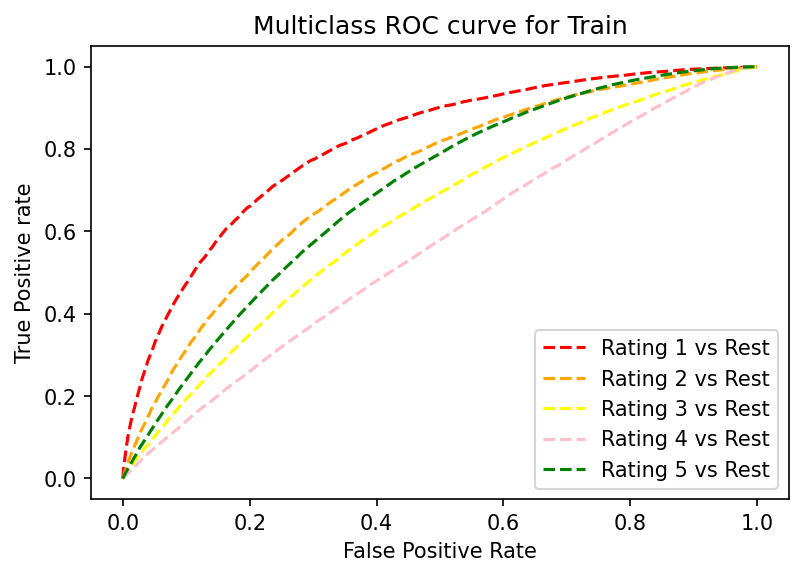

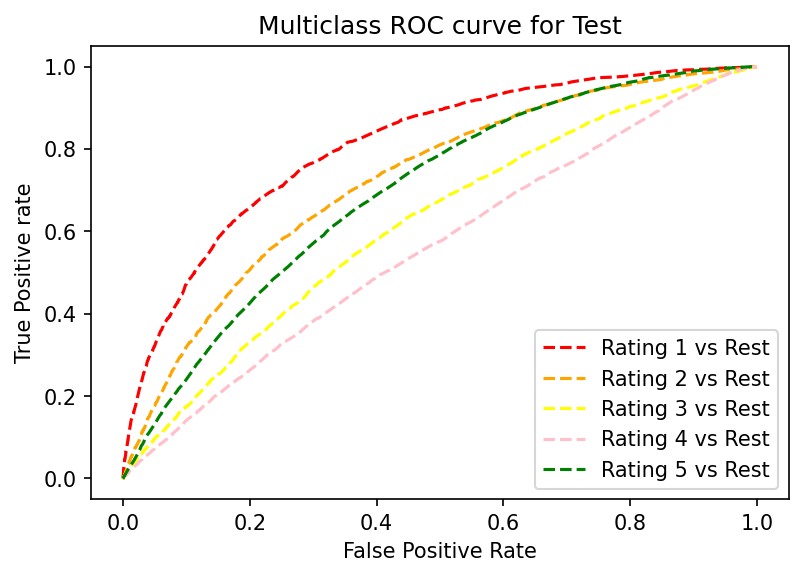

In [ ]:
train_and_evaluate(df_with_counts)

No path specified. Models will be saved in: "AutogluonModels/ag-20220606_060639/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220606_060639/"
AutoGluon Version:  0.1.0
Train Data Rows:    129616
Train Data Columns: 2
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 5, 1, 3, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5900.69 MB
	Train Data (Original)  Memory Usage: 2.07 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify speci

Train size = (129616, 3)  | Test size = (32405, 3)


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 2 | ['Scaled_Num_of_pos_words', 'Scaled_Num_of_neg_words']
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 2 | ['Scaled_Num_of_pos_words', 'Scaled_Num_of_neg_words']
	0.2s = Fit runtime
	2 features in original data used to generate 2 features in processed data.
	Train Data (Processed) Memory Usage: 2.07 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.37s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric argument of fit()
Automatically generating train/validation split with holdout_frac=0.01928774225404271, Train Rows: 127116, Val Rows: 2500
Fitting model: NeuralNetMXNet ...
	0.5256	 = 

Training Complete
Model Evaluation on Train data
Predictive performance on given data: accuracy = 0.5209156277002839


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5209156277002839
MCC: 0.14794613883905952
Confusion Matrix: 
      1  2  3  4      5
1  3836  0  0  0   8188
2  1896  0  0  0   7790
3  1466  0  0  0  11694
4  1490  0  0  0  27354
5  2219  0  0  0  63683
Rating: 1
Precision: 0.3517007426423398, Recall: 0.3190286094477711, F1:0.3345689241637957
Rating: 2
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 3
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 4
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 5
Precision: 0.536463115686258, Recall: 0.9663287912354709, F1:0.6899155521610305
Area under curve (AUC) Rating 1:  0.8090754959681743
Area under curve (AUC) Rating 2:  0.7316535797027583
Area under curve (AUC) Rating 3:  0.6399740131707388
Area under curve (AUC) Rating 4:  0.5688943198061651
Area under curve (AUC) Rating 5:  0.6981293387647132
Model Evaluation on Test data
Predictive performance on given data: accuracy = 0.5209156277002839


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.521493596667181
MCC: 0.15113337876204996
Confusion Matrix: 
     1  2  3  4      5
1  996  0  0  0   2061
2  484  0  0  0   1926
3  359  0  0  0   2912
4  346  0  0  0   6864
5  554  0  0  0  15903
Rating: 1
Precision: 0.36363636363636365, Recall: 0.3258096172718351, F1:0.34368530020703936
Rating: 2
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 3
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 4
Precision: 0.0, Recall: 0.0, F1:0.0
Rating: 5
Precision: 0.5360682262522753, Recall: 0.9663365133377894, F1:0.6895908765691738
Area under curve (AUC) Rating 1:  0.8079447875312945
Area under curve (AUC) Rating 2:  0.725267309420173
Area under curve (AUC) Rating 3:  0.6284965912050785
Area under curve (AUC) Rating 4:  0.5622507465348644
Area under curve (AUC) Rating 5:  0.6980621428252136


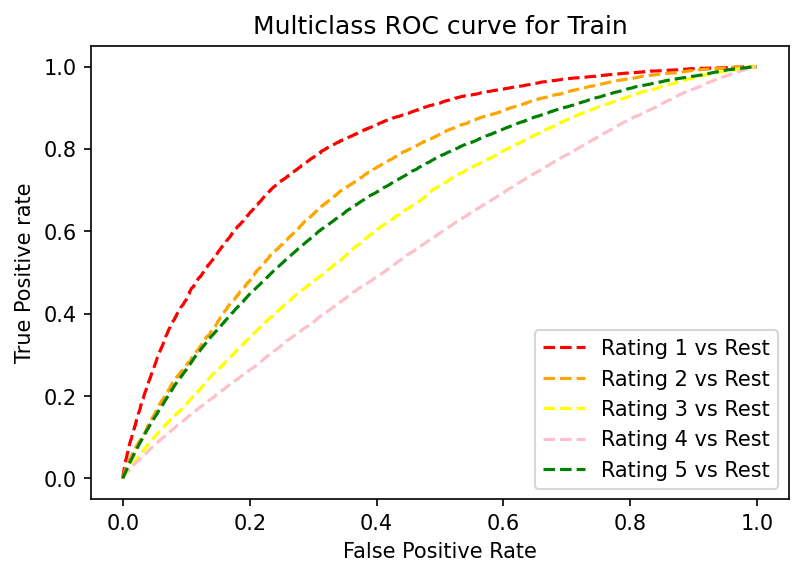

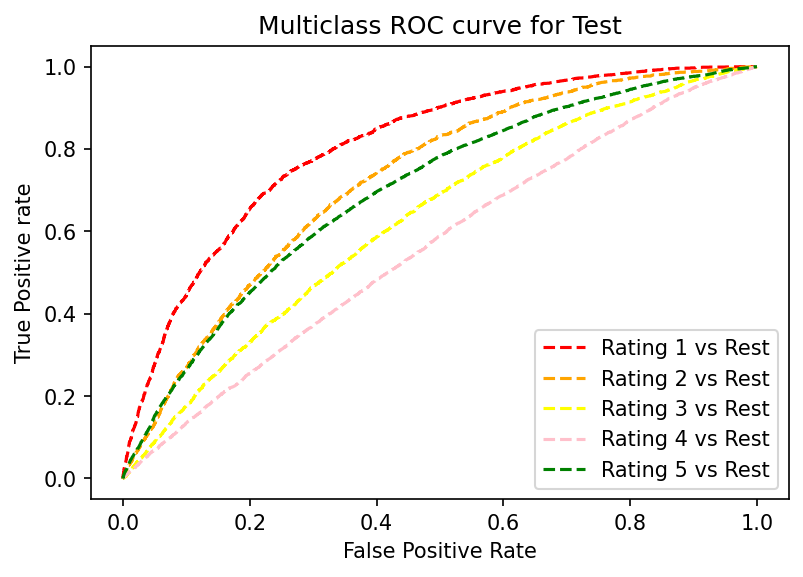

In [ ]:
train_and_evaluate(df_with_scaled_counts)

#### Model Used - AutoGluon
* There is not much difference in the accuracy between the models using scaled counts and counts

# Question 3 [2 points]

1. Fit a multi-category machine learning model to the data using only the Review column as features and the Rating column as the label. 

2. Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC. 

(Think about how you would like to manage the text column. Do you want to remove numbers, punctuation, stopwords, and do stemming?)

What framework did you choose? (lots of choices: Fasttext, spaCy, AutoGluon, TensorFlow, PyTorch, GLMnet, sklearn, etc.)

In [ ]:
df_with_reviews = df2.loc[ : ,('Review', 'Rating')]
df_with_reviews

,Review,Rating
1,$5 for a cup of coffee that was not refilled. ...,2
2,********??\nWe have been a long time patron of...,3
3,"2 stars for the waiting staff, 3 stars for the...",3
4,"2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",2
5,A friend and I went here for lunch for the fir...,5
...,...,...
162017,Sabor! \n\nChilangos is part of the Milk&Honey...,4
162018,The salsa roja has improved! WOOHOO!! And now ...,4
162019,"This review is solely based on one time, eatin...",5
162020,Very fresh tasty food. Has been in business f...,4


No path specified. Models will be saved in: "AutogluonModels/ag-20220606_061408/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220606_061408/"
AutoGluon Version:  0.1.0
Train Data Rows:    129616
Train Data Columns: 1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 5, 1, 3, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (129616, 2)  | Test size = (32405, 2)


	Available Memory:                    5959.1 MB
	Train Data (Original)  Memory Usage: 74.94 MB (1.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...


Training Complete
Model Evaluation on Train data


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Predictive performance on given data: accuracy = 0.6898453894580916


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Accuracy: 0.6898453894580916
MCC: 0.5152868422958103
Confusion Matrix: 
      1     2     3      4      5
1  8656   877   571    500   1420
2  2394  3179  1660   1148   1305
3  1061   906  5285   3565   2343
4   452   269  1505  11871  14747
5   566   130   484   4298  60424
Rating: 1
Precision: 0.6593038312133445, Recall: 0.7198935462408517, F1:0.6882678010575279
Rating: 2
Precision: 0.5929863831374743, Recall: 0.3282056576502168, F1:0.4225426995414368
Rating: 3
Precision: 0.5560231457127828, Recall: 0.4015957446808511, F1:0.4663578204279727
Rating: 4
Precision: 0.5551866055560752, Recall: 0.41155872971848567, F1:0.47270338071914947
Rating: 5
Precision: 0.7530502623412555, Recall: 0.9168765743073047, F1:0.8269274194100218
Area under curve (AUC) Rating 1:  0.9632279027676104
Area under curve (AUC) Rating 2:  0.9235083454886848
Area under curve (AUC) Rating 3:  0.8901211394553598
Area under curve (AUC) Rating 4:  0.8119406006321808
Area under curve (AUC) Rating 5:  0.9017986454125
Model

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Predictive performance on given data: accuracy = 0.6898453894580916


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Accuracy: 0.6547446381731215
MCC: 0.4584191157013667
Confusion Matrix: 
      1    2     3     4      5
1  2085  302   161   116    393
2   690  507   561   320    332
3   302  288  1075   975    631
4   117   82   469  2665   3877
5   152   29   135  1256  14885
Rating: 1
Precision: 0.6231320980274955, Recall: 0.6820412168792934, F1:0.6512572231766359
Rating: 2
Precision: 0.4197019867549669, Recall: 0.2103734439834025, F1:0.2802653399668325
Rating: 3
Precision: 0.44773011245314454, Recall: 0.32864567410577805, F1:0.3790550070521862
Rating: 4
Precision: 0.4998124531132783, Recall: 0.369625520110957, F1:0.42497209376494977
Rating: 5
Precision: 0.7398846803857242, Recall: 0.9044783374855685, F1:0.813943950786056
Area under curve (AUC) Rating 1:  0.9532389829262369
Area under curve (AUC) Rating 2:  0.893749463084788
Area under curve (AUC) Rating 3:  0.860403861959845
Area under curve (AUC) Rating 4:  0.7772675076153576
Area under curve (AUC) Rating 5:  0.8898358524809447


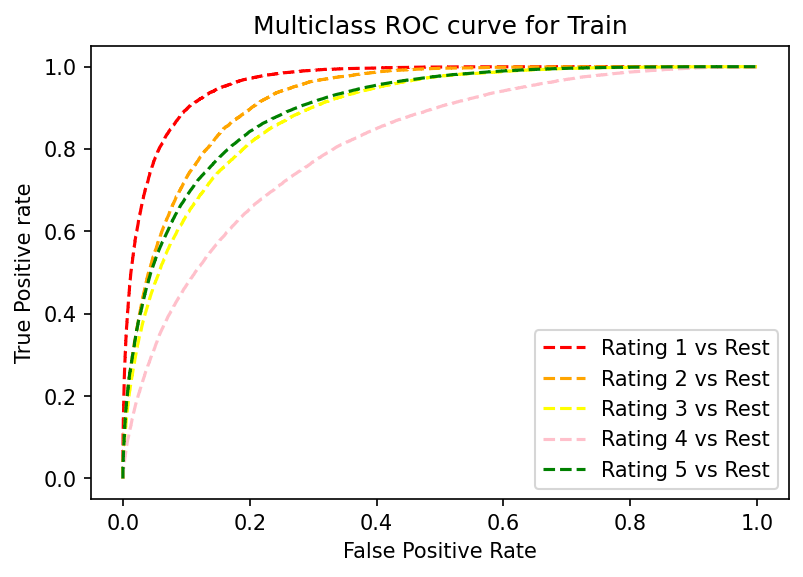

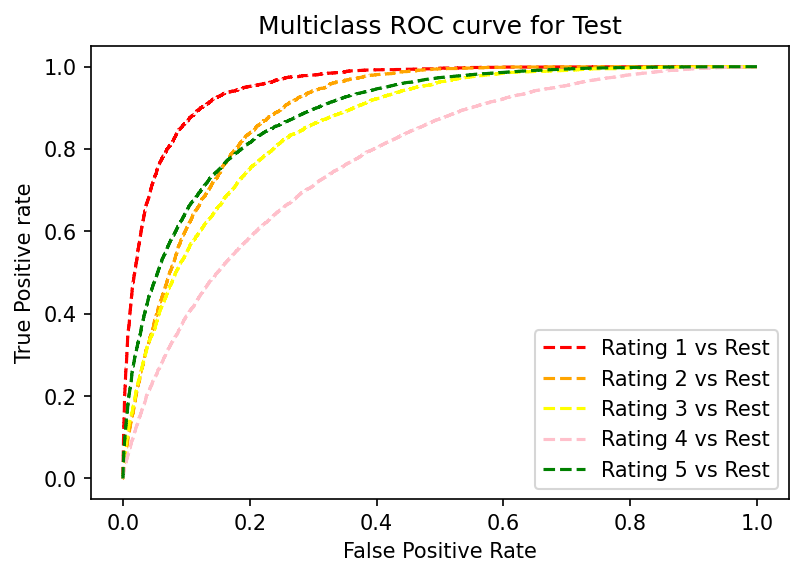

In [ ]:
train_and_evaluate(df_with_reviews)

#### Model Used - AutoGluon

## Question 4 [3 points]

Now try and use the two new columns and the Review column to build a model that uses both, the text and the positive/negative scores to construct a model. 
``
Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC.

In [ ]:
df_with_reviews_and_counts = df2.loc[ : ,('Review','Pos_Count','Neg_Count', 'Rating')]
df_with_reviews_and_counts

,Review,Pos_Count,Neg_Count,Rating
1,$5 for a cup of coffee that was not refilled. ...,1,3,2
2,********??\nWe have been a long time patron of...,8,8,3
3,"2 stars for the waiting staff, 3 stars for the...",6,6,3
4,"2.5-3 Overall\n\nPrice\nIt's Santa Barbara, so...",33,17,2
5,A friend and I went here for lunch for the fir...,15,8,5
...,...,...,...,...
162017,Sabor! \n\nChilangos is part of the Milk&Honey...,3,2,4
162018,The salsa roja has improved! WOOHOO!! And now ...,2,0,4
162019,"This review is solely based on one time, eatin...",16,14,5
162020,Very fresh tasty food. Has been in business f...,1,0,4


No path specified. Models will be saved in: "AutogluonModels/ag-20220606_065036/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220606_065036/"
AutoGluon Version:  0.1.0
Train Data Rows:    129616
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 5, 1, 3, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Train size = (129616, 4)  | Test size = (32405, 4)


	Available Memory:                    5682.94 MB
	Train Data (Original)  Memory Usage: 80.31 MB (1.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting IdentityFeatureGenerator...
			Fitting RenameFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fit

Training Complete
Model Evaluation on Train data


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Predictive performance on given data: accuracy = 0.6893901987408961


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arra

Accuracy: 0.6893901987408961
MCC: 0.5121730652128466
Confusion Matrix: 
      1     2     3      4      5
1  8585   773   510    525   1631
2  2384  2984  1519   1266   1533
3  1047   675  5108   3581   2749
4   438   198  1177  11381  15650
5   471   103   386   3644  61298
Rating: 1
Precision: 0.6642166344294004, Recall: 0.7139886892880905, F1:0.6882039360295
Rating: 2
Precision: 0.6304669342911473, Recall: 0.30807350815610157, F1:0.41389832859421594
Rating: 3
Precision: 0.5871264367816091, Recall: 0.38814589665653493, F1:0.46733760292772175
Rating: 4
Precision: 0.557974211893906, Recall: 0.3945707946193316, F1:0.4622570622042607
Rating: 5
Precision: 0.7397690107529477, Recall: 0.9301386907832843, F1:0.8241027674892277
Area under curve (AUC) Rating 1:  0.964729777821616
Area under curve (AUC) Rating 2:  0.9280275580260968
Area under curve (AUC) Rating 3:  0.8930032750540637
Area under curve (AUC) Rating 4:  0.8129447713643737
Area under curve (AUC) Rating 5:  0.9009022982973401
Model

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Predictive performance on given data: accuracy = 0.6893901987408961


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arra

Accuracy: 0.6464125906495911
MCC: 0.4409512111473978
Confusion Matrix: 
      1    2    3     4      5
1  2037  284  144   128    464
2   685  438  530   371    386
3   289  250  965  1025    742
4   131   57  407  2458   4157
5   133   30  107  1138  15049
Rating: 1
Precision: 0.6219847328244275, Recall: 0.6663395485770363, F1:0.6433986102337333
Rating: 2
Precision: 0.41359773371104813, Recall: 0.1817427385892116, F1:0.2525223407321995
Rating: 3
Precision: 0.4482117974918718, Recall: 0.29501681442983796, F1:0.3558259587020649
Rating: 4
Precision: 0.480078125, Recall: 0.34091539528432735, F1:0.39870235198702353
Rating: 5
Precision: 0.7235791903067602, Recall: 0.9144437017682445, F1:0.8078915581801099
Area under curve (AUC) Rating 1:  0.9518864552914016
Area under curve (AUC) Rating 2:  0.8871878923112358
Area under curve (AUC) Rating 3:  0.85452087348443
Area under curve (AUC) Rating 4:  0.7684850675136157
Area under curve (AUC) Rating 5:  0.8856196943249617


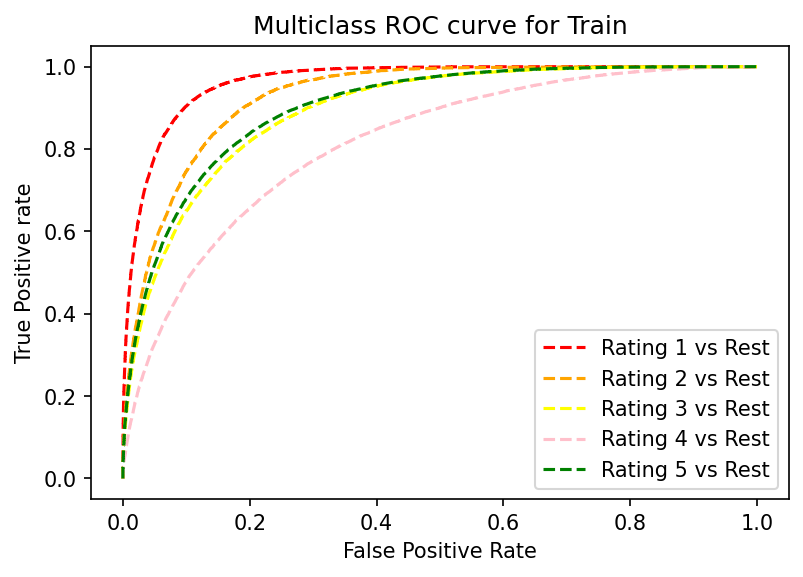

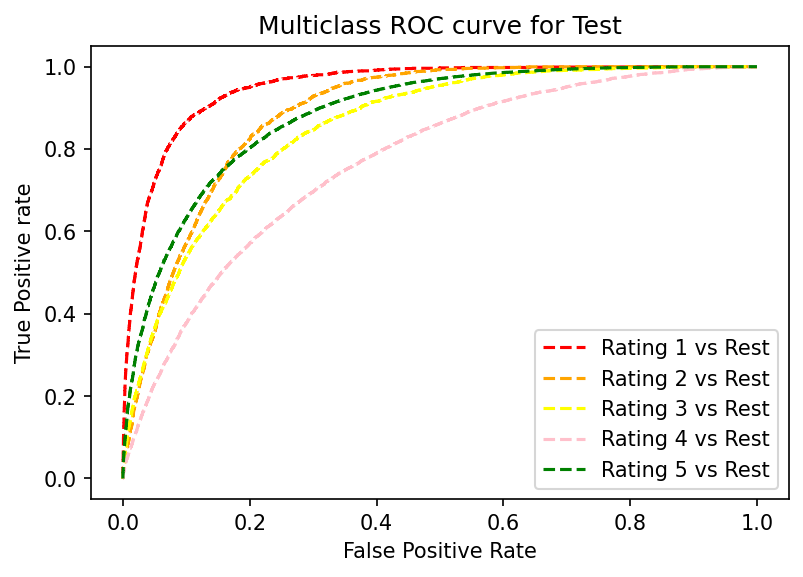

In [ ]:
train_and_evaluate(df_with_reviews_and_counts)

#### Model Used - AutoGluon